

## <span style="color:#4375c7">DAI</span>
***
*Course materials are for educational purposes only. Nothing contained herein should be considered investment advice or an opinion regarding the suitability of any security. For more information about this course, please contact us.*
***
## 1. Supervised Learning - Classification and Regression<a name="sl"></a> 

In supervised learning tasks, we have labeled data to predict a **target variable** (dependent variable) using predictor variables or **features** (independent variables). There are two different types of machine learning:

- **regression** (the target variable is a continous variable)

- **classification** (the target variable is categorical e.g., default, non-default of a company)


In this lecture, we focus on both classification and regression using supervised learning algorithms. In particular, we cover **decision trees** and powerful **random forests**. Throughout the course we will be using **[scikit-learn](https://scikit-learn.org/stable/index.html)** for the analysis. Sklearn is one of the most widely used Python libraries for solving machine learning problems.



### Session contents:
1. **[Supervised Learning - Classification and Regression](#sl)**
    - [Decision Trees](#dt)
    - [Random Forests](#rf)

    
2. **[Hands-on session](#ho)**
***

### Decision Trees <a id='dt'></a>
Decision trees are widely used for both classification (when the target variable is categorical) and regression (when the target variable is continuous). A decision tree consists of a **root**, parent nodes, child nodes, the final **leaves**, and a **decision rule** at each branch.

Decision trees find a decision rule that produces the greatest decrease in impurity at a node [4,7]. There are a number of impurity measures that indicate how well classes are separated. By default, sklearn uses the nude impurity function based on the **Gini index**, which is defined for a node $m$ as
<br/><br/>


\begin{align}
G(m) = \sum_{c=1}^C p_{mc}(1-p_{mc}) =1- \sum_{c=1}^C p_{mc}^2
\end{align}
<br/><br/>

where $p_{mc}$ denotes the proportion of observations in node $m$, which belong to class $c$, $c=1,...,C$. In the case of two classes, it simplifies to $2p ( 1 − p )$ with $p$ being either the proportion of class 1 or 2. Then, the perfect split for a node $m$ is given by the pair of feature $j \in \{1, ..., M \}$ and threshold $s \in \mathbb{R}$ that minimizes the weighted Gini index of the created child nodes $m_l$ and $m_r$
<br/><br/>

\begin{align}
(j^*,s^*)= argmin \{N_{m_l}G(m_l)+ N_{m_r}G(m_r)\}
\end{align}
<br/><br/>

where $N_{m_l}$ and $N_{m_r}$ are the number of observations in the left and right child node of
parent node $m$, which are created by the split [4,7]. The decision tree algorithm repeats this process until no improvement in the purity is possible.

<br/><br/>

**Classification Tree**

In [1]:
!pip install -r https://raw.githubusercontent.com/firrm/DAI/main/requirements.txt #ensure that the required packages are installed

## import libraries [3]
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

## load breast cancer dataset
cancer = load_breast_cancer()

## train-test-split and fit a decision tree 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,
                                                    stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=0)
tree.fit(X_train, y_train)

## calculate the model's accuracy
print("Accuracy on the training data: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test data: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training data: 0.958
Accuracy on the test data: 0.895


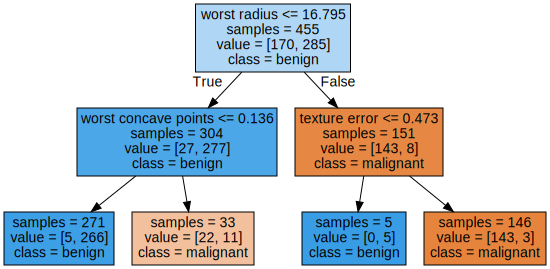

In [35]:
## For Linux-Users
## sudo apt-get install graphviz

## For Windows-Users
## conda install -c conda-forge python-graphviz
## pip install scikit-learn==1.1.3

## For Mac-Users
## pip install graphviz and conda install graphviz

## decision tree visualization
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = "decision_tree.dot", 
                class_names = ["malignant", "benign"],
                feature_names = cancer.feature_names, impurity=False, filled=True)

with open("decision_tree.dot") as f:
    graph = f.read()
display(graphviz.Source(graph))

<br/><br/>
**Regression Tree**

Regression trees are similar to decision trees for classification. Instead of reducing the Gini measure of impurity, the splits are based on how much they reduce the mean squared error (MSE). Note that our target variable is continuous [7]. 
<br/><br/>

\begin{align}
MSE = \dfrac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2
\end{align}

where $y_i$ is the true value of the target and $\hat{y_i}$ is the predicted value.
<br/><br/>



In [37]:
## import libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

## load boston house price dataset
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Alternatively:
# boston = datasets.load_boston()
# x = boston.data
# y = boston.target

## train-test-split and fit a regression tree 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

decision_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train model
reg_tree = decision_reg.fit(X_train, y_train)

In [39]:
from sklearn.metrics import mean_squared_error as MSE

## prediction
y_pred = decision_reg.predict(X_test)

## RMSE
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)
print("RMSE on the test dataset: {:.4f}".format(rmse))

RMSE on the test dataset: 2.9247


<br/><br/>
#### When to stop growing a decision tree?
By optimizing the impurity measure, we can grow very large and complex trees, which can lead to the problem of **overfitting**. There are several techniques to deal with this problem:

- set a minimum number of training inputs to be used on each leaf
- set a maximum depth of the model
- **pruning** (removing the branches that make use of features having low importance)
- use a validation set to test for overfitting
- stop growing a decision tree when the accuracy on the validation set detoriates

The graphs below show the learning curves of regression trees with different depth parameters and illustrate the problem of overfitting associated with highly complex decision trees. 

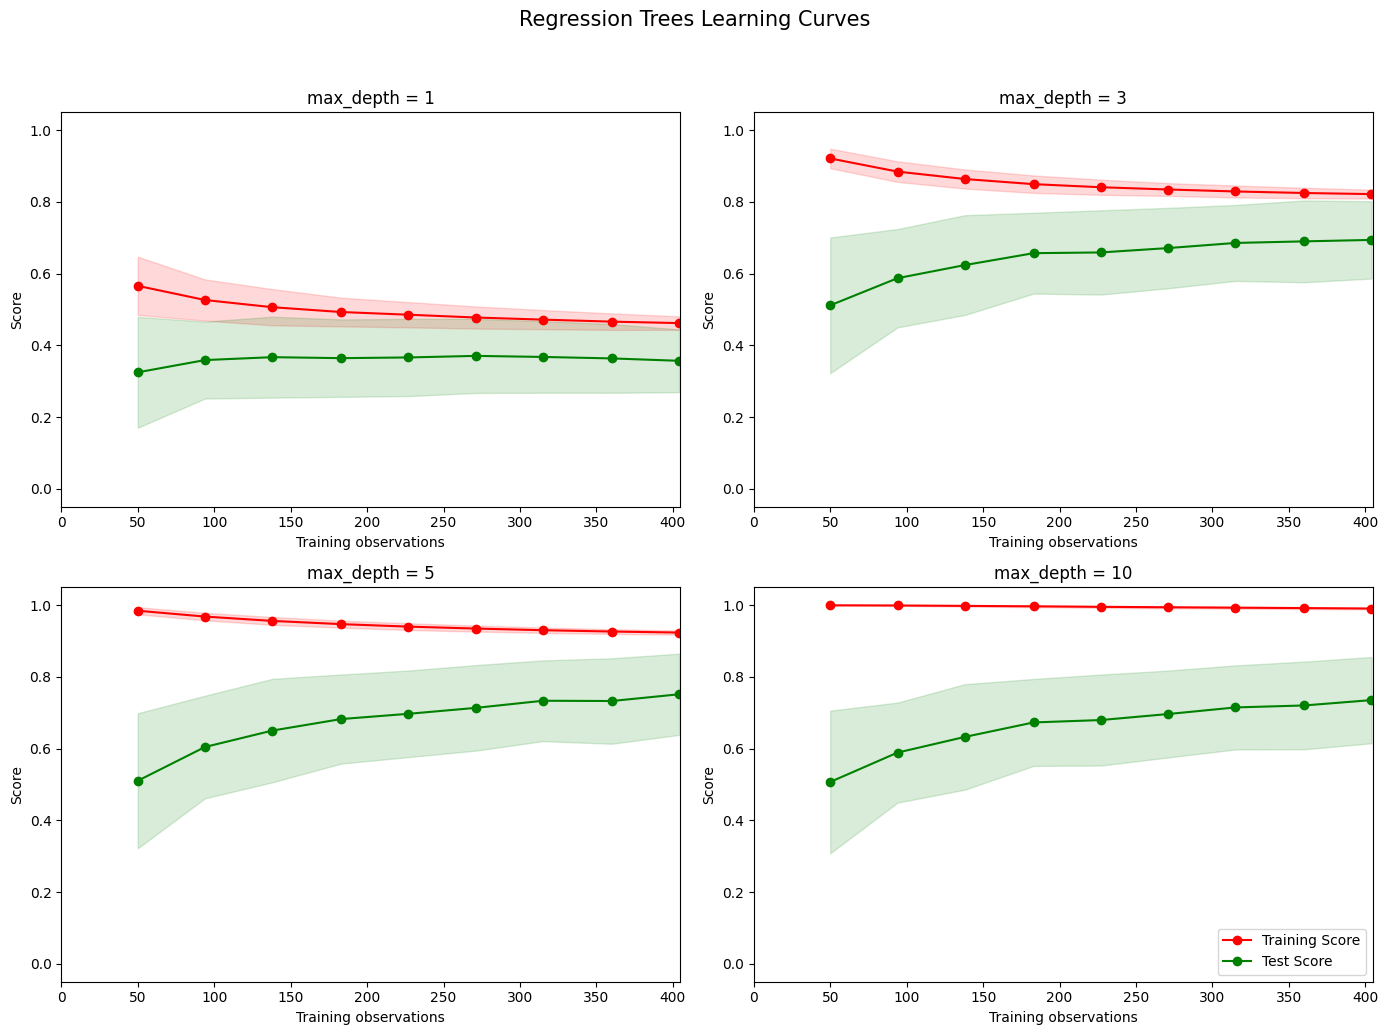

In [41]:
#function is adopted from https://github.com/prachi1210/boston-housing-prices/blob/master/visuals.py

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split, cross_val_score, cross_validate

def learning_curves(X, y):
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(50, X.shape[0]*0.8 - 1, 9)).astype(int)
    fig = plt.figure(figsize=(14,10))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,5,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Test Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Training observations')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(loc='lower right')
    fig.suptitle('Regression Trees Learning Curves', fontsize = 15, y = 1.03)
    fig.tight_layout()
    fig.show()

learning_curves(x, y)

<br/><br/>
#### Bias-Variance Tradeoff


The error we make due to **bias** is the difference between the expected prediction of the model and the true value we want to predict. By fitting several models, we obtain a variety of results. The bias measures how far off the predictions of the models are from the true value. [8]


The error we make due to **variance** is the variability of our model's prediction for a given data point. If we build our model multiple times, the variance is how much the predictions for a given observation differ between multiple realizations of our model.

As we are interested in predicting a target variable $y$ using feature variables $x$, we assume there is a relationship between $x$ and  $y$, namely $y=f(x) + \epsilon$, with error term $\epsilon$. We estimate a model $\hat{f}(x)$ of $f(x)$. The expected prediction error is defined by:
<br/><br/>

\begin{align}
Error(x) = \mathbb{E} \left[(Y-\hat{f}(x))^2  \right]
\end{align}

<br/><br/>
We can decompose the $Error(x)$ into bias and variance:
<br/><br/>

\begin{align}
Error(x) &= \left(\mathbb{E} [\hat{f}(x)] - f(x) \right)^2 + \mathbb{E} \left[\left(\hat{f}(x) -\mathbb{E}[\hat{f}(x)]\right)^2 \right] + \sigma^2_\epsilon \\[2ex]
&= \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\end{align}

<br/><br/>


In a perfect world (enough data and we know the correct model), both bias and variance can be reduced to zero. However, in our world, there is always a tradeoff between minimizing the bias and minimizing the variance of our models [4,8] (the figure below is taken from Joannes Vermorel, *lokad.com*).


<br></br>
<img src="https://raw.githubusercontent.com/firrm/DAI/main/assets/bias_variance.png" alt="Drawing" style="width: 650px;"/>
<br/><br/>


Let us look again at the learning curves calculated above. The regression tree with a depth of one suffers from a high bias. A low score on the training data is an indicator of high bias. A close performance indicates a low variance. 

The regression tree with a depth of 10 shows a high variance as we observe a large gap between training and test scores. Our model will not generalize well to unseen data. Our model with a depth of 3 shows a high test score and low variance with the ability to generalize to unseen data. [4,8].


<br></br>
<img src="https://raw.githubusercontent.com/firrm/DAI/main/assets/complexity.png" alt="Drawing" style="width: 550px;"/>
<br/><br/>

<br></br>

To sum up, we want to mention the pros and cons of classification and regression trees **(CART)**:
<br></br>


**Pro's**
- Easy to understand, interpret, and visualize
- Decision trees are useful for feature engineering
- Can be applied to regression and classification problems
- Almost no data preprocessing needed

**Con's**
- Decision-tree learners can create highly complex models that do not generalize the data (overfitting)
- Decision trees can be unstable because of outliers or noise in the data. This is called variance, which needs to be lowered by methods like bagging (see random forests later on)




<br></br>
### Random Forests <a id='rf'></a>
Decision trees are high variance estimators due to the hierarchical structure of the tree, and therefore the predictions can change drastically for small changes in the inputs [9]. To reduce this variance, Breiman (1996) introduced **bagging**, an acronym for bootstrap aggregation. This approach bootstraps a sample from the entire data set and grows a standard decision tree for each sample. The prediction is set to the majority of all decision tree results. This algorithm does reduce the variance of the prediction, but only to a lower boundery, because the individual trees are still highly correlated.  [4,9]. 

Breiman (2001) improved this algorithm with the concept of random forests. A random forest used for classification is a set of decision trees, and the forest’s outcome is determined by the majority class vote as in bagging, but the trees are grown in a more specific way. The **algorithm** for a dataset with $N$ observations works as follows:

1. Select random samples $n \leq N$ from a given dataset (bootstrap)

2. Build a decision tree for each random sample and make predictions

3. Perform a vote for each prediction

4. Select the prediction result with the majority vote as the final prediction.



Growing the trees as described leads to a decorrelation of the single predictions and a better predictive accuracy [9]. In contrast to a single decision tree, the user is not able to interpret a random forest easily, because there is no insight on how the inputs are processed.

In [43]:
## import libraries [3]
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

## load breast cancer dataset
cancer = load_breast_cancer()

## train test split and fit
X_train, X_test, y_train, y_test = train_test_split(cancer.data[:100,0:2], cancer.target[:100],random_state=42)

## random forest 
forest = RandomForestClassifier(n_estimators=5, random_state=2) # usually n_estimators = 1k or 10k
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

<br></br>

See below the decision boundaries of five randomized decision trees and the decision boundary formed by averaging their predicted probabilities. 

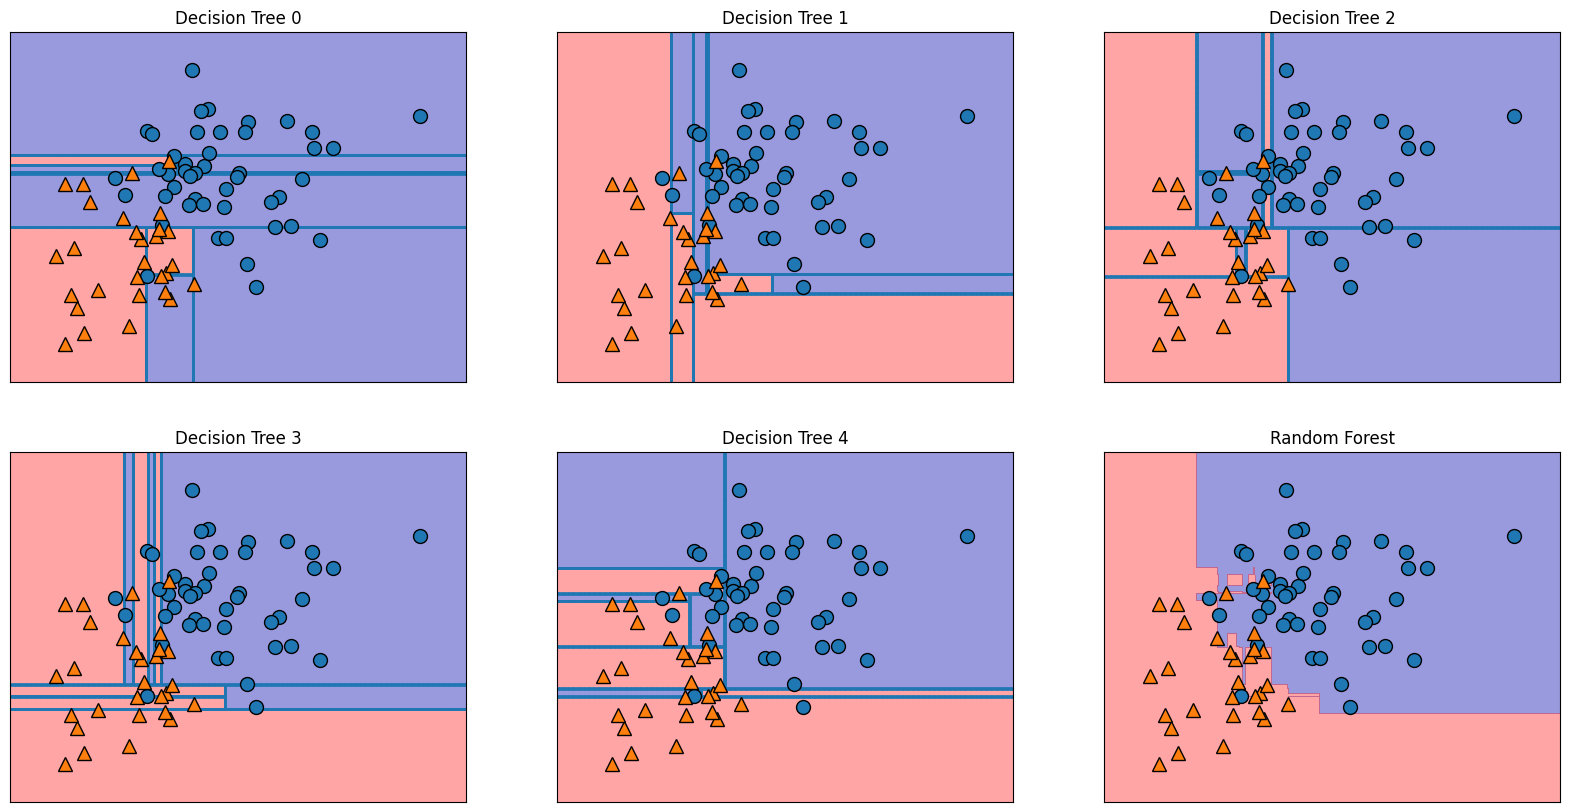

In [45]:
## visualization based on Müller 2016
## pip install scikit-learn==1.1.3
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Decision Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

<br></br>
Random forest models provide **feature importances**, which are generated by aggregating the feature importances over the trees in the forest. In general, the feature importances given by a random forest classifier are more stable than the ones provided by a single decision trees [3].

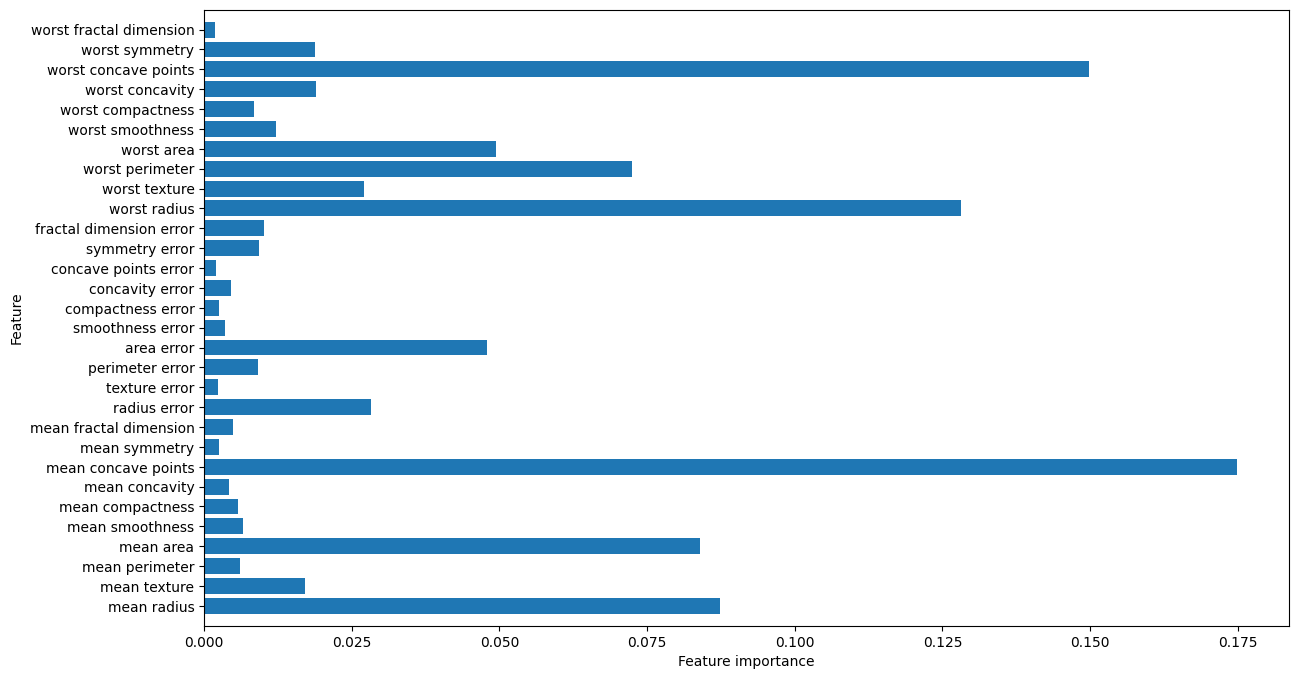

In [47]:
## train test split and fit
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=42)
forest = RandomForestClassifier(n_estimators=15, random_state=2)
forest.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    plt.rcParams['figure.figsize'] = [14, 8] #set figure width, height
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances_cancer(forest)

<br></br>

To sum up, we want to mention the pros and cons of Random Forests:
<br></br>


**Pro's**
- Random forests for regression and classification are currently among the most widely used machine learning algorithms
- Powerful algorithm; no extensive hyperparameter tuning required; no need to scale the data
- Random forests are considered to be highly accurate and robust and limit overfitting
- Random forests can handle missing data points


**Con's**
- Random forests are computionally expensive in generating predictions, because they have multiple decision trees (e.g., 10000 trees), but random forests are therefore more robust than decision trees)
- In contrast to a single decision tree, the user is not able to interpret a random forest easily, because there is no insight on how the inputs are processed

<br/><br/>

### Session takeaways 

*What have we learned in this session?*

- We know the basics of decision tree learners
- We can handle the bias-variance tradeoff
- We are able to fit single decison trees and powerful ensemble methods, such as random forests


*What next?*

During the hands-on session, you will be using both decison trees and random forests to dive deeper into classification and regression. We will consider the credit transaction data and build a fraud dectection algorithm.
***

<br/><br/>

## 2. Hands-on session <a id='ho'></a>

### Exercise 1
1. Can you explain in a few sentences how decision tree learning algorithms work?


2. In machine learning, we are often confronted with the bias-variance tradeoff. To illustrate this effect, take a closer look at the learning curves of a decision tree learner. 


3. Discuss the pros and cons of decision trees and random forests. 
***

### Exercise 2 
1. Load the credit card transaction dataset and prepare the data as we did in the last session. 


2. Use a pipeline to SMOTE, fit, and predict. Use a decision tree learning algorithm with test size of 30% and maximum depth of 10.


4. Evaluate the performance of your fitted decision tree by computing the confusion matrix and the AUC value. Change the maximum depth parameter to four and check your results again.

***

### Exercise 3
1. Fit a random forest model to the data. Use a pipeline and SMOTE your dataset. Set the number of trees to be computed to 10. 


2. For the purpose of comparison, fit random forest models with 10, 50, and 100 as the number of trees. Calculate the algorithm's running time. 


3. Evaluate the performance of your "random forests" (10, 50, and 100 trees) by computing a confusion matrix and the AUC value. 
***

### References
***

[1] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.

[2] Garreta, R., & Moncecchi, G. (2013). Learning scikit-learn: machine learning in python. Packt Publishing Ltd.

[3] Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".

[4] Friedman, Jerome, Trevor Hastie, and Robert Tibshirani (2001). The elements of statistical learning.

[5] Hosmer, David W and Stanley Lemeshow (1980). Goodness of fit tests for the
multiple logistic regression model

[6] Gujarati, D. N. (2009). Basic econometrics.

[7] Albon, C. (2018). Machine learning with python cookbook: Practical solutions from preprocessing to deep learning. " O'Reilly Media, Inc.".

[8] Scott Fortmann-Roe [Essays](http://scott.fortmann-roe.com/)

[9] Murphy, K. P. (2012). Machine learning: a probabilistic perspective. MIT press.

[10] Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.